<a href="https://colab.research.google.com/github/diogomattos1/mvp-analise-dados/blob/main/MVP_An%C3%A1lise_Dados_Diogo_Mattos%20v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**MVP** - Disciplina de Análise de Dados

**Descrição do Problema**


Fundada em 1946, a NBA (National Basketball Association) é a principal liga de basquete profissional dos Estados Unidos e do mundo.

Nos últimos anos, foi muito observado e debatido pela imprensa especializada uma mudança na forma de jogar o esporte, com as equipes dando mais ênfase ao ataque do que à defesa e priorizando os arremessos de três pontos.

O objetivo deste trabalho é analisar os dados registrados pela liga ao longo dos anos, para observar como foi esta evolução na forma de jogar, e como isso impactou o esporte.

Como a liga tem atualmente 30 equipes, e cada uma delas disputa 82 partidas na sua temporada regular, isso proporciona uma boa massa de dados para buscarmos fazer esta análise.

A ideia é suar regressão para associar os dados dos arremessos e cestas de 3 pontos com o uscesso das equipes, em número de vitórias por temporada.

O dataset que será base do trabalho foi obtido no site Kaggle: https://www.kaggle.com/datasets/sumitrodatta/nba-aba-baa-stats e salvo no github: https://github.com/diogomattos1/mvp-analise-dados/tree/dataset.

Este dataset apresenta dados de todas as temporadas da NBA, a partir de sua fundação, 1946. Entretanto, precisaremos excluir alguns dados. Como a linha de 3 pontos só foi instituída no esporte na temporada de 1979-80, este passou a ser o primeiro filtro. Algumas estatísticas avançadas só passaram a ser medidas nos anos 1990, e por isso pode ser necessário restringir ainda mais o dataset à medida em que estas informações sejam necessárias.

Para começar, vamos importar a biblioteca Panda:




In [ ]:
# Importação de pacotes
import pandas as pd
#import numpy as np
#import matplotlib.pyplot as plt
#import seaborn as sns
#from matplotlib import cm

In [ ]:
# Informa a URL onde o dataset foi armazenado
url = "https://raw.githubusercontent.com/diogomattos1/mvp-analise-dados/dataset/Team%20Stats%20Per%20Game.csv"

In [ ]:
# Lê o arquivo
dataset = pd.read_csv(url, delimiter=',')

In [ ]:
# Mostra as dimensões do dataset
dataset.shape

(1845, 28)

In [ ]:
# Mostra as primeiras linhas
dataset.head()

,season,lg,team,abbreviation,playoffs,g,mp_per_game,fg_per_game,fga_per_game,fg_percent,...,ft_percent,orb_per_game,drb_per_game,trb_per_game,ast_per_game,stl_per_game,blk_per_game,tov_per_game,pf_per_game,pts_per_game
0,2024,NBA,Atlanta Hawks,ATL,False,82.0,242.1,43.0,92.5,0.465,...,0.797,12.5,32.2,44.7,26.6,7.5,4.5,13.5,18.6,118.3
1,2024,NBA,Boston Celtics,BOS,True,82.0,241.8,43.9,90.2,0.487,...,0.807,10.7,35.6,46.3,26.9,6.8,6.6,11.9,16.2,120.6
2,2024,NBA,Brooklyn Nets,BRK,False,82.0,241.5,40.7,89.1,0.456,...,0.756,11.4,32.6,44.1,25.6,6.8,5.2,13.1,18.5,110.4
3,2024,NBA,Chicago Bulls,CHI,False,82.0,243.7,42.0,89.5,0.470,...,0.791,11.2,32.6,43.8,25.0,7.8,4.8,12.2,18.8,112.3
4,2024,NBA,Charlotte Hornets,CHO,False,82.0,240.6,40.0,87.0,0.460,...,0.786,9.3,31.0,40.3,24.8,6.9,4.5,13.8,18.0,106.6


Primeiramente, percebemos que o arquivo escolhido não traz a quantidade de vitórias das equipes, informação que seria premissa para fazer a correlação. Desta forma, precisaremos buscar a informação em outro arquivo deste mesmo dataset.

In [ ]:
# Informa a URL onde o dataset foi armazenado
url2 = "https://raw.githubusercontent.com/diogomattos1/mvp-analise-dados/dataset/Team%20Summaries.csv"

dataset2 = pd.read_csv(url2, delimiter=',')

In [ ]:
# Mostra as últimas linhas
dataset2.head()

,season,lg,team,abbreviation,playoffs,age,w,l,pw,pl,...,tov_percent,orb_percent,ft_fga,opp_e_fg_percent,opp_tov_percent,opp_drb_percent,opp_ft_fga,arena,attend,attend_g
0,2024,NBA,Atlanta Hawks,ATL,False,26.2,36.0,46.0,36.0,46.0,...,11.6,27.1,0.200,0.572,12.4,75.2,0.192,State Farm Arena,696418.0,16986.0
1,2024,NBA,Boston Celtics,BOS,True,28.2,64.0,18.0,66.0,16.0,...,10.8,24.9,0.180,0.523,10.8,76.3,0.145,TD Garden,766240.0,18689.0
2,2024,NBA,Brooklyn Nets,BRK,False,26.1,32.0,50.0,34.0,48.0,...,11.8,25.2,0.177,0.543,11.4,76.0,0.193,Barclays Center,720291.0,17568.0
3,2024,NBA,Chicago Bulls,CHI,False,28.1,39.0,43.0,37.0,45.0,...,11.0,25.1,0.187,0.556,12.7,76.4,0.195,United Center,845620.0,20625.0
4,2024,NBA,Charlotte Hornets,CHO,False,25.1,21.0,61.0,18.0,64.0,...,12.6,21.1,0.167,0.572,12.3,74.5,0.188,Spectrum Center,674400.0,16449.0


In [ ]:
# Mostra as dimensões do dataset
dataset2.shape

(1845, 31)

Veerificamos que os arquivos possuem o mesmo número de registros, Cada linha de cada arquivo traz os resultados de cada equipe em cada temporada (além de linhas que trazem o agregado de cada temporada). Sabendo disso, agora será necessário fazer uma junção dos dois arquivos.

In [ ]:
# Realizando o merge
dataset_merge = pd.merge(dataset, dataset2, on=['season', 'team'])

# Exibindo o DataFrame resultante
print(dataset_merge)

      season lg_x                     team abbreviation_x  playoffs_x     g  \
0       2024  NBA            Atlanta Hawks            ATL       False  82.0   
1       2024  NBA           Boston Celtics            BOS        True  82.0   
2       2024  NBA            Brooklyn Nets            BRK       False  82.0   
3       2024  NBA            Chicago Bulls            CHI       False  82.0   
4       2024  NBA        Charlotte Hornets            CHO       False  82.0   
...      ...  ...                      ...            ...         ...   ...   
1858    1947  BAA  Providence Steamrollers            PRO       False  60.0   
1859    1947  BAA        St. Louis Bombers            STB        True  61.0   
1860    1947  BAA          Toronto Huskies            TRH       False  60.0   
1861    1947  BAA      Washington Capitols            WSC        True  60.0   
1862    1947  BAA           League Average            NaN       False  60.0   

      mp_per_game  fg_per_game  fga_per_game  fg_pe

In [ ]:
# Exibe os tipos de cada campo da tabela do dataset
dataset_merge.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1863 entries, 0 to 1862
Data columns (total 57 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   season            1863 non-null   int64  
 1   lg_x              1863 non-null   object 
 2   team              1863 non-null   object 
 3   abbreviation_x    1758 non-null   object 
 4   playoffs_x        1863 non-null   bool   
 5   g                 1862 non-null   float64
 6   mp_per_game       1673 non-null   float64
 7   fg_per_game       1862 non-null   float64
 8   fga_per_game      1862 non-null   float64
 9   fg_percent        1862 non-null   float64
 10  x3p_per_game      1411 non-null   float64
 11  x3pa_per_game     1411 non-null   float64
 12  x3p_percent       1411 non-null   float64
 13  x2p_per_game      1862 non-null   float64
 14  x2pa_per_game     1862 non-null   float64
 15  x2p_percent       1862 non-null   float64
 16  ft_per_game       1862 non-null   float64


In [ ]:
# exibindo a quantidade de linhas por coluna
dataset_merge.count()

,0
season,1863
lg_x,1863
team,1863
abbreviation_x,1758
playoffs_x,1863
g,1862
mp_per_game,1673
fg_per_game,1862
fga_per_game,1862
fg_percent,1862


Podemos observar que o novo dataset possui 1863 linhas. Mas algumas das colunas necessárias no trabalho possuem menos registros.

As colunas *x3p_per_game* e *x3pa_per_game*, por exemplo, que trazem respectivamente a quantidade de cestas e de tentativas de cestas de 3 pontos, possuem 1411 linhas.

Este será o primeiro item a ser tratado. Como a linha de 3 pontos só foi instituída pela liga na temporada de 1979-80, obviamente os registros anteriores a ela não possuiam esta informação. Então vamos filtrar o nosso dataset com dados apenas após a adoção deste marco.

In [ ]:
dataset_filtrado = dataset_merge[dataset_merge['season'] > 1979]

# Exibe o DataFrame filtrado
print(dataset_filtrado)

      season lg_x                 team abbreviation_x  playoffs_x     g  \
0       2024  NBA        Atlanta Hawks            ATL       False  82.0   
1       2024  NBA       Boston Celtics            BOS        True  82.0   
2       2024  NBA        Brooklyn Nets            BRK       False  82.0   
3       2024  NBA        Chicago Bulls            CHI       False  82.0   
4       2024  NBA    Charlotte Hornets            CHO       False  82.0   
...      ...  ...                  ...            ...         ...   ...   
1294    1980  NBA   San Diego Clippers            SDC       False  82.0   
1295    1980  NBA  Seattle SuperSonics            SEA        True  82.0   
1296    1980  NBA            Utah Jazz            UTA       False  82.0   
1297    1980  NBA   Washington Bullets            WSB        True  82.0   
1298    1980  NBA       League Average            NaN       False  82.0   

      mp_per_game  fg_per_game  fga_per_game  fg_percent  ...  tov_percent  \
0           242.1    

In [ ]:
# exibindo a quantidade de linhas por coluna após a adoção do filtro
dataset_filtrado.count()

,0
season,1299
lg_x,1299
team,1299
abbreviation_x,1254
playoffs_x,1299
g,1299
mp_per_game,1299
fg_per_game,1299
fga_per_game,1299
fg_percent,1299


In [ ]:
# Exibe um sumário estatístico (contagem, média, desvio padrão, mínimo, máximo e quartis)
dataset_filtrado.describe()

,season,g,mp_per_game,fg_per_game,fga_per_game,fg_percent,x3p_per_game,x3pa_per_game,x3p_percent,x2p_per_game,...,e_fg_percent,tov_percent,orb_percent,ft_fga,opp_e_fg_percent,opp_tov_percent,opp_drb_percent,opp_ft_fga,attend,attend_g
count,1299.000000,1299.000000,1299.000000,1299.000000,1299.000000,1299.000000,1299.000000,1299.000000,1299.000000,1299.000000,...,1299.000000,1299.000000,1299.000000,1299.000000,1299.000000,1299.000000,1299.000000,1299.000000,1.275000e+03,859.000000
mean,2003.085450,80.367206,241.683064,39.072440,84.371594,0.462677,5.835643,16.517552,0.335683,33.239800,...,0.497333,13.832179,28.400385,0.228489,0.497250,13.830793,71.580062,0.228605,6.362340e+05,16600.710128
std,12.714281,5.731260,0.824475,3.248654,4.652632,0.020702,3.808898,10.260921,0.045595,5.319076,...,0.025769,1.299809,4.324833,0.030420,0.024511,1.366755,4.047204,0.031669,1.661899e+05,3798.949396
min,1980.000000,50.000000,240.000000,30.800000,71.200000,0.401000,0.100000,0.900000,0.104000,23.100000,...,0.424000,9.900000,17.900000,0.143000,0.423000,10.300000,61.500000,0.145000,5.817000e+03,162.000000
25%,1992.500000,82.000000,241.200000,36.500000,81.000000,0.448000,2.800000,8.300000,0.324000,29.500000,...,0.479000,13.000000,25.100000,0.206500,0.480000,12.900000,68.200000,0.206000,5.577695e+05,15353.000000
50%,2004.000000,82.000000,241.500000,38.800000,84.300000,0.462000,5.500000,15.600000,0.348000,31.300000,...,0.494000,13.800000,28.500000,0.227000,0.495000,13.800000,71.600000,0.226000,6.673220e+05,17248.000000
75%,2014.000000,82.000000,242.100000,41.600000,87.900000,0.476000,8.100000,22.400000,0.364000,37.550000,...,0.512000,14.700000,31.700000,0.249500,0.512000,14.700000,74.800000,0.250000,7.463230e+05,18830.000000
max,2024.000000,82.000000,244.900000,48.500000,108.100000,0.545000,16.700000,45.400000,0.428000,48.200000,...,0.578000,18.700000,39.100000,0.334000,0.576000,19.000000,81.600000,0.347000,1.072572e+06,33072.000000


Agora vamos aproveitar apenas as linhas que apresentam os resultados consolidados de cada temporada. Estas trazem as médias de de cada temporada, e serão a base para as nossas consultas.

In [ ]:
# Exclui as linhas por time, exibindo apenas a média de toda a liga por ano
dataset_consolidado = dataset_filtrado.loc[dataset_filtrado['team'] == 'League Average']

# Exibe o DataFrame filtrado
#print(dataset_consolidado)
dataset_consolidado.count()

,0
season,45
lg_x,45
team,45
abbreviation_x,0
playoffs_x,45
g,45
mp_per_game,45
fg_per_game,45
fga_per_game,45
fg_percent,45


Agora, podemos fazer um resumo estatístico do conjunto.

In [ ]:
# Exibe um sumário estatístico (contagem, média, desvio padrão, mínimo, máximo e quartis)
dataset_consolidado.describe()

,season,g,mp_per_game,fg_per_game,fga_per_game,fg_percent,x3p_per_game,x3pa_per_game,x3p_percent,x2p_per_game,...,e_fg_percent,tov_percent,orb_percent,ft_fga,opp_e_fg_percent,opp_tov_percent,opp_drb_percent,opp_ft_fga,attend,attend_g
count,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,...,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,40.00000
mean,2002.000000,80.466667,241.697778,39.266667,84.582222,0.463644,5.548889,15.755556,0.336111,33.722222,...,0.496711,13.895556,28.702222,0.229378,0.496711,13.895556,71.297778,0.229378,626603.911111,16139.42500
std,13.133926,5.631083,0.245402,2.908608,3.815059,0.015005,3.692291,10.014684,0.035578,5.284191,...,0.018833,0.903517,3.753634,0.019997,0.018833,0.903517,3.753634,0.019997,136909.572010,3137.56904
min,1980.000000,50.000000,241.100000,34.200000,78.200000,0.437000,0.500000,2.000000,0.238000,28.200000,...,0.466000,12.100000,22.200000,0.192000,0.466000,12.100000,66.500000,0.192000,49476.000000,1374.00000
25%,1991.000000,82.000000,241.500000,36.800000,81.200000,0.453000,2.300000,7.100000,0.331000,29.800000,...,0.487000,13.300000,26.300000,0.209000,0.487000,13.300000,67.700000,0.209000,575820.000000,15110.25000
50%,2002.000000,82.000000,241.700000,39.000000,84.600000,0.461000,5.500000,15.300000,0.354000,30.800000,...,0.493000,13.900000,28.700000,0.232000,0.493000,13.900000,71.300000,0.232000,687864.000000,17333.50000
75%,2013.000000,82.000000,241.900000,42.000000,88.400000,0.475000,7.200000,20.000000,0.358000,39.100000,...,0.500000,14.500000,32.300000,0.245000,0.500000,14.500000,73.700000,0.245000,713186.000000,17823.75000
max,2024.000000,82.000000,242.200000,43.800000,90.600000,0.492000,12.800000,35.200000,0.367000,43.000000,...,0.547000,15.800000,33.500000,0.262000,0.547000,15.800000,77.800000,0.262000,749434.000000,19181.00000


Podemos observar, primeiramente, que, com os tratamentos realizados anteriormente, não temos mais valores vazios nos campos. Desta forma, a princípio parece ter sido resolvido o problema de valores discrepantes ou inconsistentes.

Também é possivel perceber que, de fato, o maior desvio padrão entre todas as estatísticas de jogo é na coluna *x3pa_per_game* (arremessos de 3 pontos por partida), o que indica que este item do esporte evoluiu em um ritmo diferente dos demais aspectos.



In [ ]:
# ordenando o dataframe pela data
dataset_consolidado.sort_values(by='season')

,season,lg_x,team,abbreviation_x,playoffs_x,g,mp_per_game,fg_per_game,fga_per_game,fg_percent,...,tov_percent,orb_percent,ft_fga,opp_e_fg_percent,opp_tov_percent,opp_drb_percent,opp_ft_fga,arena,attend,attend_g
1298,1980,NBA,League Average,NaN,False,82.0,241.8,43.6,90.6,0.481,...,15.5,33.5,0.235,0.486,15.5,66.5,0.235,NaN,589616.0,13800.0
1275,1981,NBA,League Average,NaN,False,82.0,241.4,43.0,88.4,0.486,...,15.6,33.5,0.245,0.489,15.6,66.5,0.245,NaN,411228.0,11827.0
1251,1982,NBA,League Average,NaN,False,82.0,241.6,43.3,88.2,0.491,...,15.0,33.0,0.241,0.495,15.0,67.0,0.241,NaN,429808.0,13526.0
1227,1983,NBA,League Average,NaN,False,82.0,241.3,43.5,89.7,0.485,...,15.8,33.4,0.233,0.488,15.8,66.6,0.233,NaN,406843.0,12587.0
1203,1984,NBA,League Average,NaN,False,82.0,242.0,43.5,88.4,0.492,...,15.0,33.0,0.255,0.495,15.0,67.0,0.255,NaN,427247.0,14176.0
1179,1985,NBA,League Average,NaN,False,82.0,241.4,43.8,89.1,0.491,...,14.9,32.9,0.252,0.496,14.9,67.1,0.252,NaN,454445.0,14856.0
1155,1986,NBA,League Average,NaN,False,82.0,241.6,43.2,88.6,0.487,...,14.9,32.4,0.258,0.493,14.9,67.6,0.258,NaN,487508.0,12858.0
1131,1987,NBA,League Average,NaN,False,82.0,241.6,42.6,88.8,0.480,...,14.3,33.4,0.262,0.488,14.3,66.6,0.262,NaN,524600.0,11375.0
1107,1988,NBA,League Average,NaN,False,82.0,241.3,42.1,87.7,0.480,...,14.3,32.8,0.254,0.489,14.3,67.2,0.254,NaN,545315.0,NaN
1083,1989,NBA,League Average,NaN,False,82.0,241.5,42.5,89.0,0.477,...,14.5,33.0,0.249,0.489,14.5,67.0,0.249,NaN,581579.0,NaN


Feito este pré-processamento, podemos começar a trabalhar com os gráficos, para tentar obter mais insights sobre o dataset.



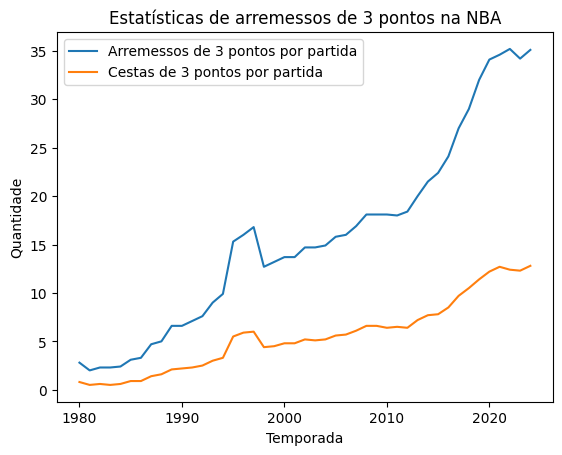

In [ ]:
# Importar biblioteca  de exemplo
import matplotlib.pyplot as plt

# Configurações do gráfico
plt.plot(dataset_consolidado.season, dataset_consolidado.x3pa_per_game, label='Arremessos de 3 pontos por partida')
plt.plot(dataset_consolidado.season, dataset_consolidado.x3p_per_game, label='Cestas de 3 pontos por partida')

plt.xlabel('Temporada')
plt.ylabel('Quantidade')
plt.title('Estatísticas de arremessos de 3 pontos na NBA')

plt.legend()  # Exibe a legenda com as linhas correspondentes

plt.show()  # Exibe o gráfico

Após importar a biblioteca Matplotlib, conseguimos exibir um gráfico com a evolução das tentativas e das cestas de 3 ao longo da história da liga. Podemos observar após o ano de 2010 um crescimento acima da tendência.

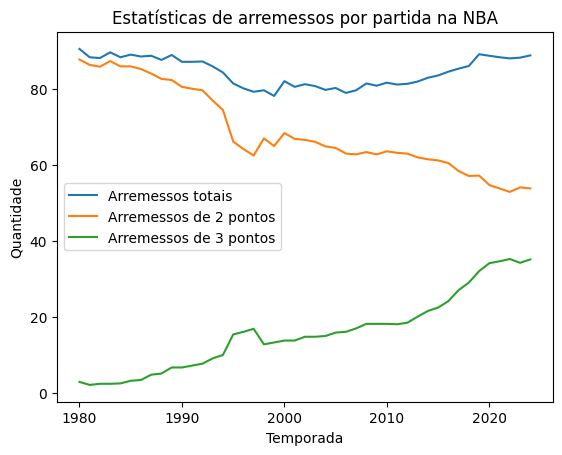

In [ ]:
plt.plot(dataset_consolidado.season, dataset_consolidado.fga_per_game, label='Arremessos totais')
plt.plot(dataset_consolidado.season, dataset_consolidado.fga_per_game - dataset_consolidado.x3pa_per_game, label='Arremessos de 2 pontos')
plt.plot(dataset_consolidado.season, dataset_consolidado.x3pa_per_game, label='Arremessos de 3 pontos')


plt.xlabel('Temporada')
plt.ylabel('Quantidade')
plt.title('Estatísticas de arremessos por partida na NBA')

plt.legend()  # Exibe a legenda com as linhas correspondentes

plt.show()  # Exibe o gráfico

Agora uma outra abordagem: um gráfico comparando a quantidade de arremessos de 3 pontos e de arremessos totais ao longo dos anos. Fica mais evidente que as tentativas de 3 pontos evoluíram constantemente, em detrimento das tentativas de 2 pontos; enquanto que os arremessos em geral se mantiveram relativamente estáveis.

In [ ]:
# Gráfico de Linhas

# selecionando apenas os atributos para serem plotados em um novo dataframe, sem a classe
atributos = dataset_consolidado.columns.drop(['especie'])

# criando o eixo x - vai de 0 até a quantidade de linhas do dataset iris - de 0 a 149
x_data = range(0, iris.shape[0])

# plotando cada atributo
for atributo in atributos: # esse for percorre a lista: ['comprimento_sepala', 'largura_sepala', 'comprimento_petala', 'largura_petala']
    plt.plot(x_data, iris[atributo], label=atributo)

# incluindo título do gráfico e legenda
plt.title('Variação dos atributos do dataset Iris')
plt.legend();

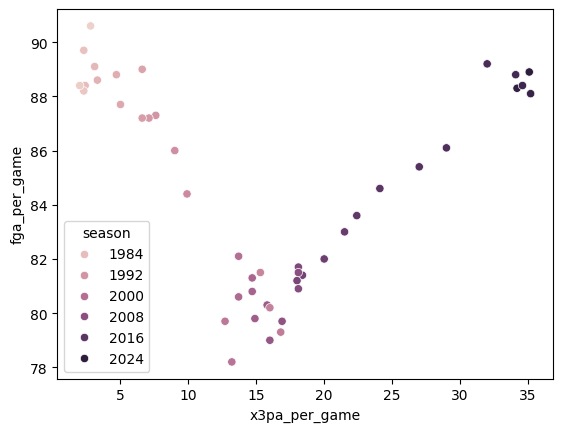

In [ ]:
import seaborn as sns

# scatter plot com Seaborn colorido por classes
sns.scatterplot(x=dataset_consolidado.x3pa_per_game, y=dataset_consolidado.fga_per_game, hue= dataset_consolidado.season);

Aqui apresentamos uma outra visão, onde percebemos o avanço das tentativas de 3 pontos ao longo dos anos. Já os arremessos de 2 pontos tiveram uma queda no início dos anos 2000 para depois retomarem a patamares mais parecidos com o dos anos 1980.

Isso mostra que, na verdade, tivemos nos últimos anos um aumento do número de arremessos como um todo.

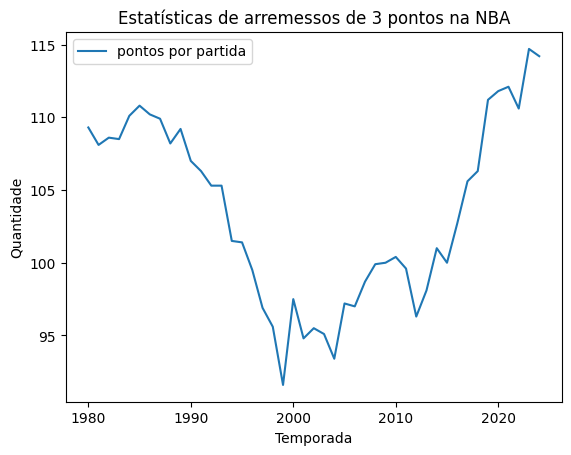

In [ ]:
# Configurações do gráfico
plt.plot(dataset_consolidado.season, dataset_consolidado.pts_per_game, label='pontos por partida')
#plt.plot(dataset_consolidado.season, dataset_consolidado.x3p_per_game, label='Cestas de 3 pontos por partida')

plt.xlabel('Temporada')
plt.ylabel('Quantidade')
plt.title('Estatísticas de arremessos de 3 pontos na NBA')

plt.legend()  # Exibe a legenda com as linhas correspondentes

plt.show()  # Exibe o gráfico